# Análisis del PIB per capita

MINE-4101: Applied Data Science  
Universidad de los Andes  
**Danilo Andrés Alfonso Bohórquez**


**Contexto de Negocio:** El Banco Mundial es una organización internacional que se dedica a brindar apoyo
financiero y técnico a países en desarrollo mediante préstamos para proyectos de
infraestructura, sectoriales, institucionales, entre otros, buscando mejorar el bienestar
económico y social de su población. El diseño de políticas de préstamos más informadas y
adaptadas a las necesidades y realidades de cada país, no solo maximiza la probabilidad de
que los préstamos sean reembolsados en su totalidad, sino que también asegura que los
fondos se utilicen de manera efectiva en las necesidades reales del territorio.


Last update: October, 2023

In [1]:
# Importamos todas las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from matplotlib.image import imread
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
!pip install mlxtend
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
!pip install scipy
from scipy import stats
from sklearn.linear_model import LinearRegression
!pip install xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_squared_log_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

In [2]:
# Configuramos pandas para obtener el número de filas y columnas necesarias 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

#Quitamos los mensajes de advertencia

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Diccionario de Datos

1.Unique Identifier:
Identificador único para un país específico.

2.Income per person:
Ingreso per cápita - Producto Interno Bruto (PIB) per cápita en 2010 en dólares estadounidenses constantes de 2000. Se ha tenido en cuenta la inflación, pero no las diferencias en el costo de vida entre países.

3.Alcohol consumption:
Consumo de alcohol - Consumo de alcohol en 2008 por adulto (edad 15+) en litros. Consumo promedio registrado y estimado de alcohol por persona adulta (15+) en litros de alcohol puro.

4.Armed forces personnel:
Personal de las fuerzas armadas (% del total de la fuerza laboral).

5.Breast cancer per 100,000:
Cáncer de mama por 100,000 habitantes - Nuevos casos de cáncer de mama en 2002 por cada 100,000 mujeres. Número de nuevos casos de cáncer de mama por cada 100,000 mujeres durante un año específico.

6.CO2 emissions:
Emisiones de CO2 - Emisiones acumuladas de CO2 en 2006 (toneladas métricas). Cantidad total de emisiones de CO2 en toneladas métricas desde 1751.

7.Female employment rate:
Tasa de empleo femenino - Empleados femeninos en 2007, mayores de 15 años (% de la población). Porcentaje de la población femenina, mayores de 15 años, que estuvo empleada durante el año dado.

8.HIV rate:
Tasa de VIH - Prevalencia estimada de VIH en 2009 (% de las edades 15-49). Número estimado de personas que viven con VIH por cada 100 personas en el grupo de edad de 15 a 49 años.

9.Internet user rate:
Usuarios de Internet - Usuarios de Internet en 2010 (por cada 100 personas). Personas con acceso a la red mundial de internet.

10.Life expectancy:
Expectativa de vida - Expectativa de vida al nacer en 2011 (años). El número promedio de años que viviría un recién nacido si los patrones de mortalidad actuales se mantuvieran iguales.

11.Oil consumption per capita:
Consumo de petróleo per cápita - Consumo de petróleo per cápita en 2010 (toneladas por año y por persona).

12.Polity score:
Puntaje de política - Puntaje de democracia en 2009 (Polity). Puntaje global de política a partir del conjunto de datos Polity IV, calculado restando un puntaje de autocracia a un puntaje de democracia. La medida resumida de la naturaleza democrática y libre de un país. -10 es el valor más bajo y 10 es el más alto.

13.Residential electricity consumption per person:
Consumo de electricidad residencial per cápita - Consumo de electricidad residencial en 2008 por persona (kWh). La cantidad de consumo de electricidad residencial por persona durante el año dado, contada en kilovatios-hora (kWh).

14.Suicide per 100,000:
Tasa de suicidios por 100,000 habitantes - Suicidios, ajustados por edad, por cada 100,000 habitantes. Mortalidad debido a lesiones autoinfligidas, por cada 100,000 habitantes de la población estándar ajustada por edad.

15.Employment rate:
Tasa de empleo - Empleados totales en 2007, mayores de 15 años (% de la población). Porcentaje de la población total, mayores de 15 años, que estuvo empleada durante el año dado.

16.Urbanization rate:
Tasa de urbanización - Población urbana (% del total). La población urbana se refiere a las personas que viven en áreas urbanas según lo definido por las oficinas estadísticas nacionales (calculado utilizando estimaciones de población del Banco Mundial y ratios urbanos de las Perspectivas de Urbanización Mundial de las Naciones Unidas).

### ENTENDIMIENTO INICIAL DE LOS DATOS 

## 1. Loading the data (cargamos los datasets necesarios)

In [3]:
# Cargamos los datasets necesarios para nuestro análisis
pib_df =pd.read_csv("gapminder_final.csv")
#Cargamos el dataset de regiones
regiones_df=pd.read_csv("region.csv",delimiter=";")
#Cargamos el dataset de variables adicionales
variables_adicionales=pd.read_csv("features_adicionales.csv",delimiter=";")

In [4]:
pib_df.head(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Ireland,27595.091350,14.92,0.450024,74.9,1.633779e+09,51.000000,0.2,69.770394,80.557,1.700262,10.0,2051.802338,10.365070,59.900002,61.34
1,Albania,1914.996551,7.29,1.024736,57.4,2.237473e+08,42.099998,NaN,44.989947,76.918,NaN,9.0,636.341383,7.699330,51.400002,46.72
2,Central African Rep.,239.518749,3.17,0.148659,16.5,8.338000e+06,62.900002,4.7,2.300027,48.398,NaN,-1.0,NaN,13.548420,71.300003,38.58
3,Barbados,9243.587053,6.42,0.663956,62.5,3.616067e+07,60.299999,1.4,70.028599,76.835,NaN,NaN,NaN,3.108603,66.900002,39.84
4,Italy,18982.269290,9.72,1.729346,74.4,1.900045e+10,35.799999,0.3,53.740217,81.855,1.207250,10.0,1176.385457,4.930045,46.400002,68.08


In [5]:
pib_df.count()

country                 178
incomeperperson         175
alcconsumption          178
armedforcesrate         174
breastcancerper100th    177
co2emissions            176
femaleemployrate        177
hivrate                 155
internetuserate         174
lifeexpectancy          178
oilperperson             67
polityscore             167
relectricperperson      141
suicideper100th         178
employrate              177
urbanrate               178
dtype: int64

In [6]:
# Mostramos las dimensiones de nuestro dataframe 
pib_df.shape

(178, 16)

In [7]:
#Información de los datos
print('\nFilas : ',pib_df.shape[0]) #número de filas
print('\nColumnas :', pib_df.shape[1]) #número de columnas
print('\nColumnas:',pib_df.columns.to_list()) #lista de columnas
print(' \nÚnicos:\n',pib_df.nunique()) #número de términos únicos por variable


Filas :  178

Columnas : 16

Columnas: ['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore', 'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate']
 
Únicos:
 country                 167
incomeperperson         163
alcconsumption          159
armedforcesrate         162
breastcancerper100th    133
co2emissions            164
femaleemployrate        145
hivrate                  46
internetuserate         163
lifeexpectancy          164
oilperperson             61
polityscore              21
relectricperperson      129
suicideper100th         166
employrate              132
urbanrate               163
dtype: int64


Como podemos observar existen duplicados en la base ya que hay algunos países repetidos.

**Eliminamos los duplicados para realizar nuestro análisis univariado y bivariado**

In [8]:
pib_df=pib_df.drop_duplicates()

**Debido a que Macedonia cambio su nombre a Macedonia FYR, después de años de disputa en este ejercicio eliminaremos a "Macedonia" de nuestro análisis**

In [9]:
pib_df = pib_df[pib_df['country'] != 'Macedonia']
pib_df.reset_index(drop=True, inplace=True)

# Verificamos el porcentaje de valores nulos por variable

In [10]:
# Observamos la cantidad de columnas con valores nulos

percentage_result = pib_df.isnull().sum()/pib_df.shape[0] * 100
# Creamos un DataFrame para mostrar los resultados
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,country,0.000000
1,incomeperperson,1.807229
2,alcconsumption,0.000000
3,armedforcesrate,2.409639
4,breastcancerper100th,0.602410
5,co2emissions,1.204819
6,femaleemployrate,0.602410
7,hivrate,13.253012
8,internetuserate,1.807229
9,lifeexpectancy,0.000000


In [11]:
#Ajustamos la configuración para números grandes
pd.options.display.float_format = '{:.2f}'.format

descripcion_pib = pib_df.describe()

print(descripcion_pib)

       incomeperperson  alcconsumption  armedforcesrate  breastcancerper100th  \
count           163.00          166.00           162.00                165.00   
mean           7202.02            6.66             1.36                 37.45   
std           10469.30            5.03             1.52                 23.04   
min             103.78            0.03             0.00                  3.90   
25%             602.50            2.44             0.48                 20.60   
50%            2344.90            5.92             0.92                 29.80   
75%            8550.03            9.74             1.57                 50.10   
max           52301.59           23.01             9.82                101.10   

         co2emissions  femaleemployrate  hivrate  internetuserate  \
count          164.00            165.00   144.00           163.00   
mean    6056341804.88             47.94     1.97            33.65   
std    28304856599.48             14.78     4.42            27.

Podemos observar el comportamiento de algunas variables como el ingreso de PIB per cápita por persona es de 7202 dólares estadounidenses al año, sin embargo, existen países donde este ingreso es alrededor de 100 dólares lo que representa índices de pobreza altos en comparación con países desarrollados.

**Realizamos el cruce de las regiones a las que pertenecen los países**

In [12]:
pib_df = pd.merge(pib_df, regiones_df[['country','world_region']], on='country', how='left')

In [13]:
pib_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,world_region
0,Ireland,27595.09,14.92,0.45,74.90,1633778667.00,51.00,0.20,69.77,80.56,1.70,10.00,2051.80,10.37,59.90,61.34,europe
1,Albania,1915.00,7.29,1.02,57.40,223747333.30,42.10,NaN,44.99,76.92,NaN,9.00,636.34,7.70,51.40,46.72,europe
2,Central African Rep.,239.52,3.17,0.15,16.50,8338000.00,62.90,4.70,2.30,48.40,NaN,-1.00,NaN,13.55,71.30,38.58,africa
3,Barbados,9243.59,6.42,0.66,62.50,36160666.67,60.30,1.40,70.03,76.83,NaN,NaN,NaN,3.11,66.90,39.84,americas
4,Italy,18982.27,9.72,1.73,74.40,19000454000.00,35.80,0.30,53.74,81.86,1.21,10.00,1176.39,4.93,46.40,68.08,europe


# Análisis Univariado Emisiones de CO2

In [14]:
regiones_df.head()

,sigle,country,world_region
0,abkh,Abkhazia,europe
1,abw,Aruba,americas
2,afg,Afghanistan,asia
3,ago,Angola,africa
4,aia,Anguilla,americas


In [15]:
pib_df["co2_mayor_a_media"] = np.where(pib_df["co2emissions"]> pib_df["co2emissions"].mean(), 'si', 'no')

In [16]:
# % de paises que superan la media de valores de CO2
pib_df["co2_mayor_a_media"].value_counts('%')

co2_mayor_a_media
no   0.86
si   0.14
Name: proportion, dtype: float64

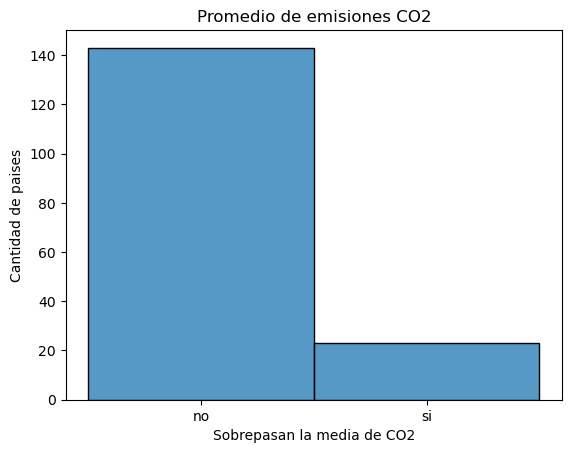

In [17]:
sns.histplot(pib_df, x="co2_mayor_a_media")
plt.xlabel('Sobrepasan la media de CO2')
plt.ylabel('Cantidad de paises')
plt.title('Promedio de emisiones CO2')
plt.show()

Se puede observar que el 86% de los países está por debajo de la media de emisiones de C02 y solamente el 14% supera este indicador, este tipo de emisiones generalmente se asocian a mayor produccción industrial, mayores tecnologías y mayor uso de recursos por parte de países que generalmente son potencialmente desarrollados. 

# Expectativa de Vida

In [18]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8)
    plt.title("Expectativa de Vida en años".format(var_name=x.name))
    plt.xlabel("Años")
    plt.ylabel("Cantidad de Países")
    plt.show()

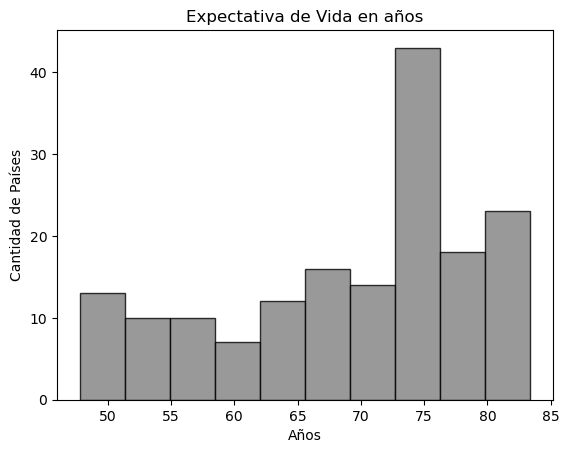

In [19]:
plot_histogram(pib_df['lifeexpectancy'])

La mayor parte de los países tienen una esperanza de vida concentrada alrededor de los 75 años, esto está relacionado con la calidad de vida de la población.

# Puntaje Indicador de la democracia (polityscore)

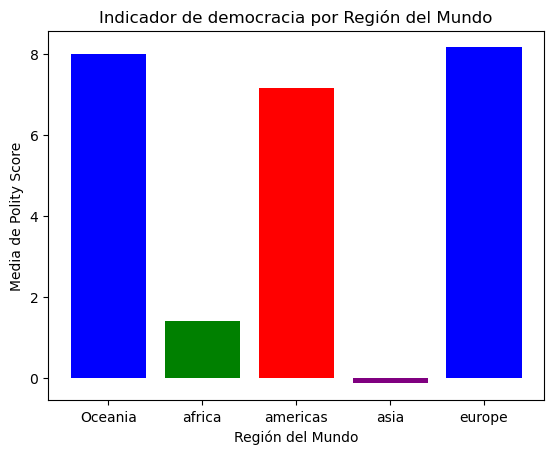

In [20]:
media_polityscore_por_region = pib_df.groupby('world_region')['polityscore'].mean()
colors = ['blue', 'green', 'red', 'purple']
plt.bar(media_polityscore_por_region.index, media_polityscore_por_region, color=colors)
plt.xlabel('Región del Mundo')
plt.ylabel('Media de Polity Score')
plt.title('Indicador de democracia por Región del Mundo')
plt.show()


Se puede evidenciar que en algunas zonas la percepción de democracia es mayor que en otras, lo que está determinado en gran parte por las dictaduras y sistemas de gobierno existentes. 

# Tasa de desempleo

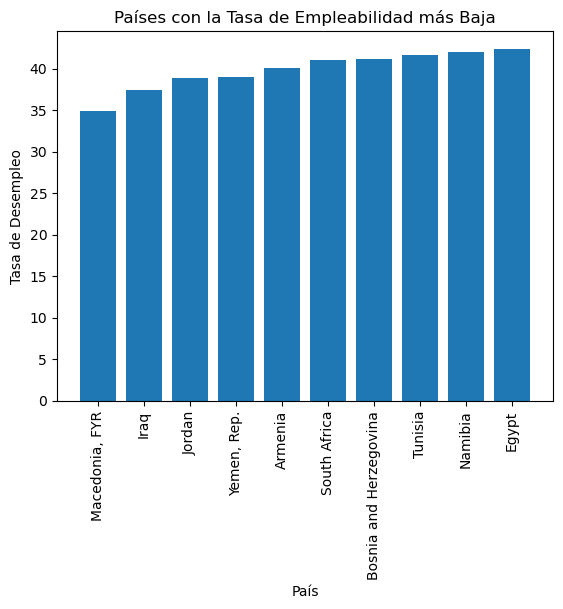

In [21]:
pib_df_sorted = pib_df.sort_values('employrate')
top_10_lowest_unemployment = pib_df_sorted.head(10)
plt.bar(top_10_lowest_unemployment['country'], top_10_lowest_unemployment['employrate'])
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Tasa de Desempleo')
plt.title('Países con la Tasa de Empleabilidad más Baja')
plt.show()

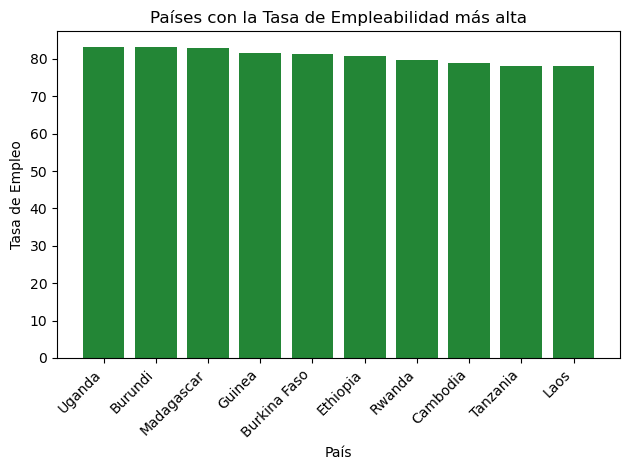

In [22]:
pib_df_clean = pib_df.dropna(subset=['employrate'])
pib_df_sorted = pib_df_clean.sort_values('employrate', ascending=False)
top_10_lowest_unemployment = pib_df_sorted.head(10)
colores_verde_pastel_degradado = ['#238636']
plt.bar(top_10_lowest_unemployment['country'], top_10_lowest_unemployment['employrate'], color=colores_verde_pastel_degradado)
plt.xticks(rotation=45, ha='right')
plt.xlabel('País')
plt.ylabel('Tasa de Empleo')
plt.title('Países con la Tasa de Empleabilidad más alta')
plt.tight_layout()
plt.show()


Países con tasas de empleabilidad altas no necesariamente implican ingresos altos por persona, ya que esto depende en gran medida de factores como la inflación, las políticas de gasto público, y los niveles de escolaridad de la población.

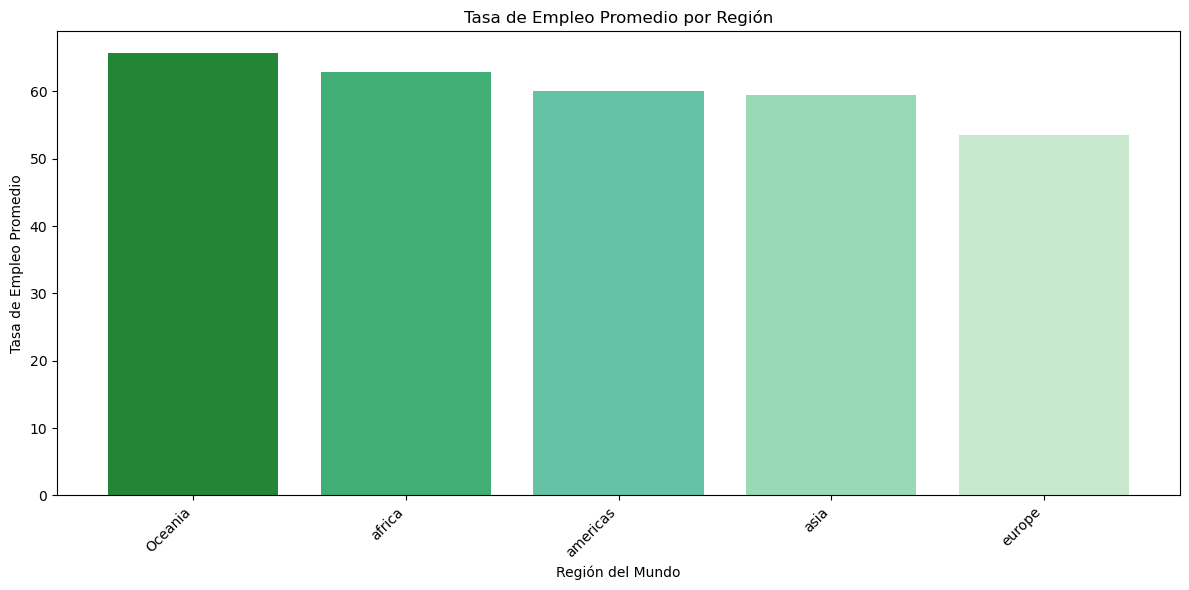

In [23]:
pib_df_clean = pib_df.dropna(subset=['employrate'])
mean_employrate_by_region = pib_df_clean.groupby('world_region')['employrate'].mean().sort_values(ascending=False)
colores = ['#238636', '#41AE76', '#66C2A4', '#98D9B6', '#C9E9CF', '#E5F1E7', '#F7FCF0']
plt.figure(figsize=(12, 6))
plt.bar(mean_employrate_by_region.index, mean_employrate_by_region, color=colores)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Región del Mundo')
plt.ylabel('Tasa de Empleo Promedio')
plt.title('Tasa de Empleo Promedio por Región')


plt.tight_layout()


plt.show()

En particular, el gráfico muestra que las regiones desarrolladas, como Europa y América del Norte, tienen una tasa de empleo más alta que las regiones en desarrollo, como África y Asia. Esto sugiere que hay más oportunidades de empleo en las regiones desarrolladas.

# Acceso a Internet por Usuario 

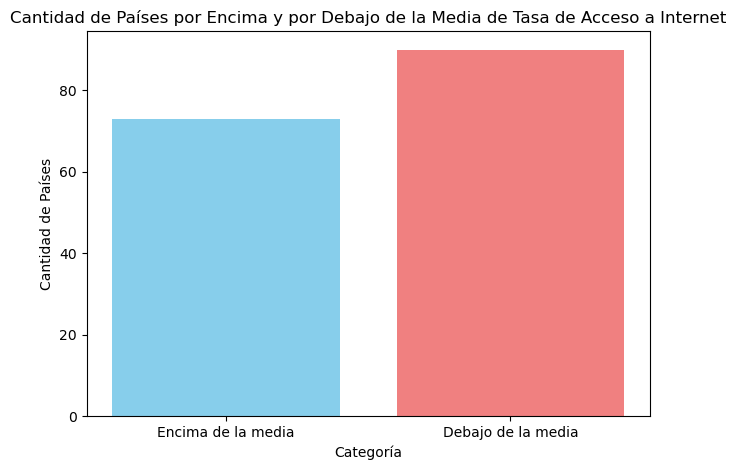

In [24]:
media_internet_user_rate = pib_df['internetuserate'].mean()
paises_encima_media = pib_df[pib_df['internetuserate'] > media_internet_user_rate].shape[0]
paises_debajo_media = pib_df[pib_df['internetuserate'] < media_internet_user_rate].shape[0]
cantidad_paises = [paises_encima_media, paises_debajo_media]
etiquetas = ['Encima de la media', 'Debajo de la media']
plt.bar(etiquetas, cantidad_paises, color=['skyblue', 'lightcoral'])


plt.xlabel('Categoría')
plt.ylabel('Cantidad de Países')
plt.title('Cantidad de Países por Encima y por Debajo de la Media de Tasa de Acceso a Internet')


plt.tight_layout()
plt.show()

La mayor parte de los países del mundo no cuentan con acceso a internet ya que se ubican por debajo de la media, esto sugiere que aún hay falencias en el acceso a pesar de los esfuerzoz tecnológicos actuales

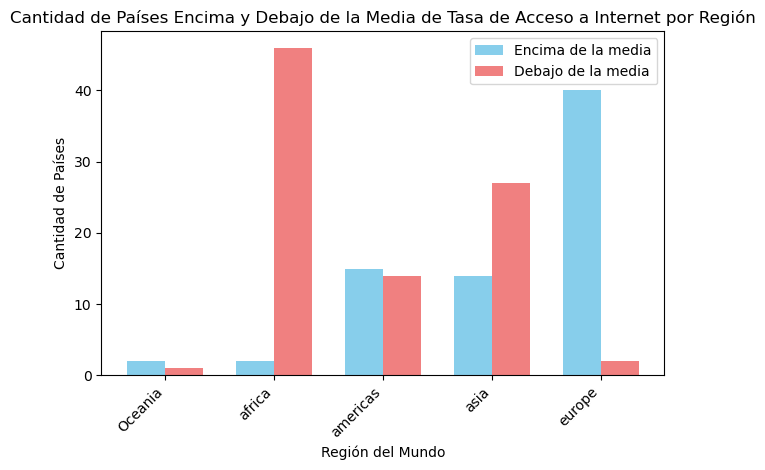

In [25]:
media_internet_user_rate = pib_df['internetuserate'].mean()
paises_encima_media_por_region = pib_df[pib_df['internetuserate'] > media_internet_user_rate].groupby('world_region').size()
paises_debajo_media_por_region = pib_df[pib_df['internetuserate'] < media_internet_user_rate].groupby('world_region').size()
etiquetas = paises_encima_media_por_region.index  
x = np.arange(len(etiquetas))  
ancho_barra = 0.35
fig, ax = plt.subplots()
barra_encima = ax.bar(x - ancho_barra/2, paises_encima_media_por_region.values, ancho_barra, label='Encima de la media', color='skyblue')
barra_debajo = ax.bar(x + ancho_barra/2, paises_debajo_media_por_region.values, ancho_barra, label='Debajo de la media', color='lightcoral')
plt.xlabel('Región del Mundo')
plt.ylabel('Cantidad de Países')
plt.title('Cantidad de Países Encima y Debajo de la Media de Tasa de Acceso a Internet por Región')

ax.legend()


ax.set_xticks(x)
ax.set_xticklabels(etiquetas, rotation=45, ha='right')


plt.tight_layout()
plt.show()

Como podemos evidenciar África es el continente menos conectado a internet en el mundo, por su parte, aproximadamente la mitad de países del continente americano está por debajo de la media de la tasa de conexión a internet, no obstante, se puede evidenciar de igual forma que Europa es el continente más conectado del mundo lo que demuestra que son países desarrollados sin embargo, esto se validará más adelante.

# Análisis Bivariado

**Comportamiento de la tasa de empleo vs el ingreso Pib per capita por persona para los 10 países con la tasa de empleo más alta**

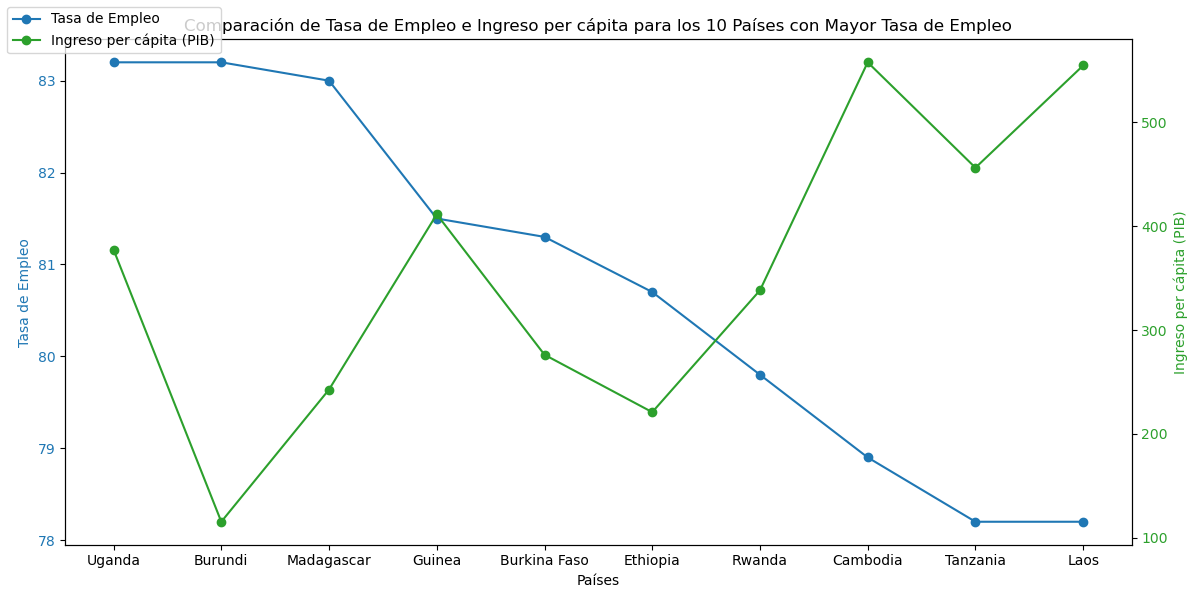

In [26]:
pib_df_sorted_by_employrate = pib_df.sort_values('employrate', ascending=False)
top_10_highest_employrate = pib_df_sorted_by_employrate.head(10)
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Países')
ax1.set_ylabel('Tasa de Empleo', color=color)
ax1.plot(top_10_highest_employrate['country'], top_10_highest_employrate['employrate'], label='Tasa de Empleo', marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Ingreso per cápita (PIB)', color=color)
ax2.plot(top_10_highest_employrate['country'], top_10_highest_employrate['incomeperperson'], label='Ingreso per cápita (PIB)', marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Comparación de Tasa de Empleo e Ingreso per cápita para los 10 Países con Mayor Tasa de Empleo')
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
fig.legend(loc="upper left")
plt.show()


Una tasa de empleo alta no necesariamente implica que los ciudadanos de dichos países perciban ingresos altos, de hecho para los 10 países con las tasas de empleabilidad más altas, su ingreso percibido es inferior al 75% de la muestra ya que se ubica por debajo de los 602 dólares.

**Expectativa de vida y suicidios por cada 100.000 habitantes**

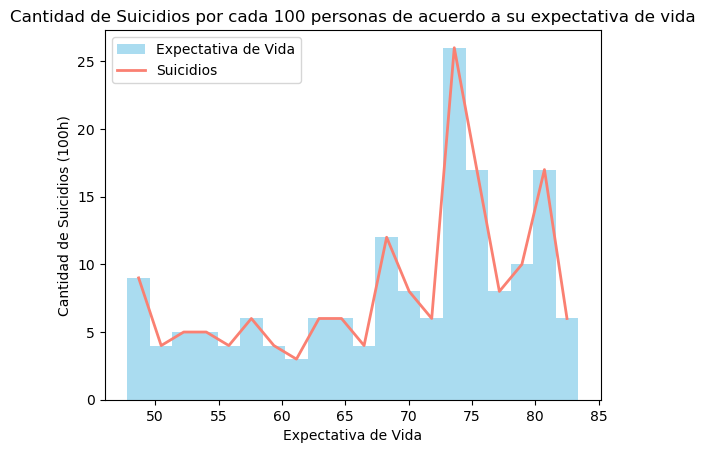

In [27]:
expectancy_data = pib_df['lifeexpectancy'].dropna()
suicide_data = pib_df['suicideper100th'].dropna()
plt.hist(expectancy_data, bins=20, alpha=0.7, color='skyblue', label='Expectativa de Vida')
hist, bin_edges = np.histogram(expectancy_data, bins=20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  
plt.plot(bin_centers, hist, color='salmon', label='Suicidios', linewidth=2)  

plt.xlabel('Expectativa de Vida')
plt.ylabel('Cantidad de Suicidios (100h)')
plt.title('Cantidad de Suicidios por cada 100 personas de acuerdo a su expectativa de vida')


plt.legend()
plt.show()



Las tasas de suicidio en las personas mayores varían entre las culturas, sin embargo, información de la Organización Mundial de la Salud revela el aumento de la prevalencia de éste con la edad. En el caso de los hombres, la tasa asciende del 19,2 por cada 100 mil habitantes entre los 15 y 24 años al 55,7 por cada 100 mil habitantes entre los mayores de 75 años. En las mujeres, los valores correspondientes ascienden a 5,6 por cada 100 mil y a 18,9 por cada 100 mil, respectivamente.

**Relación entre la tasa de Urbanización y la tasa de Uso de Internet**

Nombres únicos de regiones: {'africa', 'americas', 'europe', 'asia', 'Oceania'}


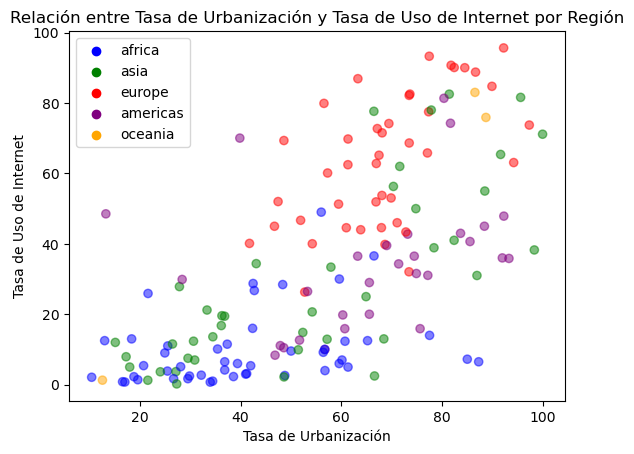

In [28]:
pib_df_clean = pib_df.dropna(subset=['urbanrate', 'internetuserate'])


urbanization_rate = pib_df_clean['urbanrate']
internet_use_rate = pib_df_clean['internetuserate']
world_region = pib_df_clean['world_region']

region_colors = {
    'africa': 'blue',
    'asia': 'green',
    'europe': 'red',
    'americas': 'purple',
    'oceania': 'orange'
}


unique_regions = set(world_region)
print("Nombres únicos de regiones:", unique_regions)


colors = [region_colors.get(region.lower(), 'gray') for region in world_region]


plt.scatter(urbanization_rate, internet_use_rate, alpha=0.5, c=colors)


plt.xlabel('Tasa de Urbanización')
plt.ylabel('Tasa de Uso de Internet')
plt.title('Relación entre Tasa de Urbanización y Tasa de Uso de Internet por Región')


for region, color in region_colors.items():
    plt.scatter([], [], color=color, label=region)


plt.legend()
plt.show()


Como podemos evidenciar a pesar de que en el continente africano existen algunos países con una tasa de urbanización mayor al 80% su uso de internet es muy bajo, el país con el mayor uso de internet alrededor del 50% tiene una tasa de urbanización de cerca del 60%, lo que no muestra una relación directa entre estas dos variables, por su parte Asia tiene una distribución más uniforme con diferentes tasas sin embargo, una gran concentración de países con acceso a internet inferior al 20%. Por otro lado, los países del contiente americano en su mayoria se encuentran urbanizados y con tasas de acceso a internet variadas, sin embargo, ninguno de estos supera el 85% de cobertura. Finalmente, el contiente europeo es el más urbanizado y a la vez el que tiene un mayor acceso a internet ya que en este caso si podemos observar una relación directa entre estas dos variables.  

# Correlación entre las variables 

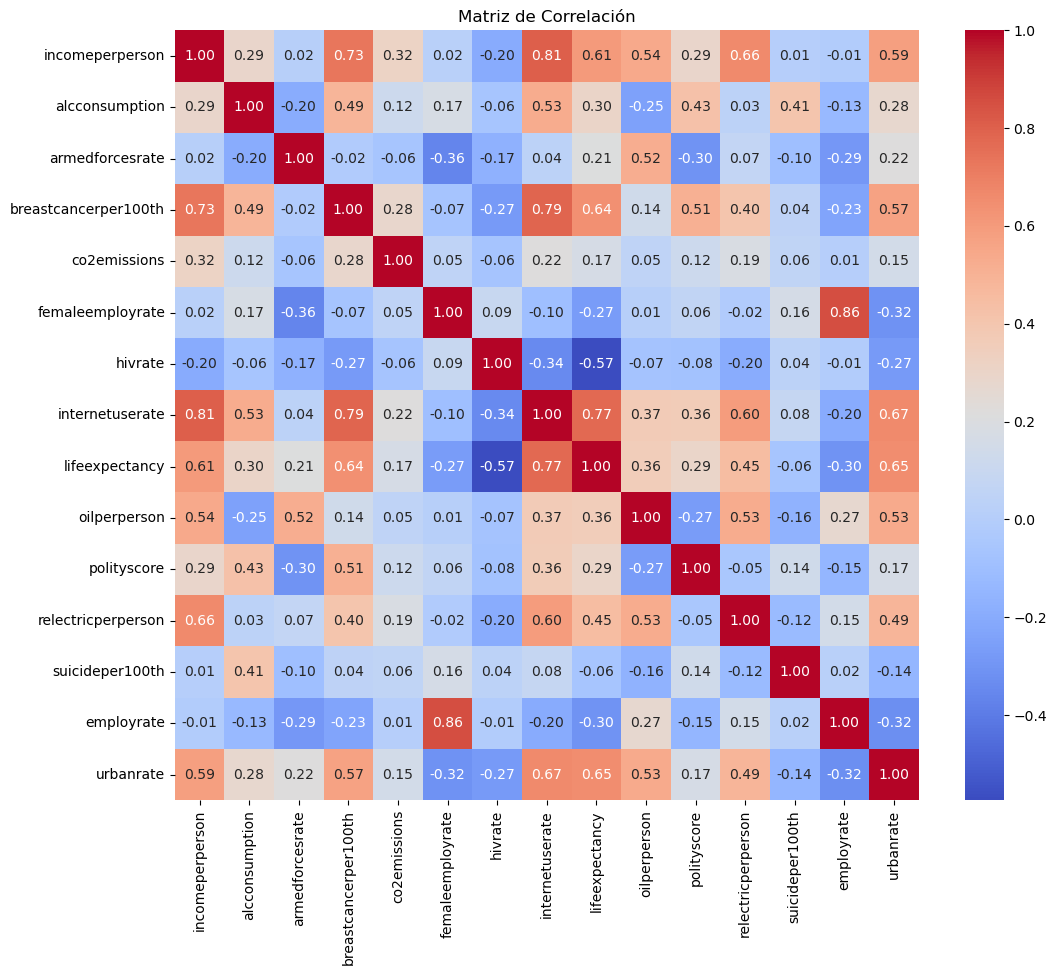

In [29]:
numeric_columns = pib_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# 2. Preparación de datos

**Valores Faltantes**

In [30]:
missing_values_count = pib_df.isnull().sum()
missing_values_count[0:16]

country                   0
incomeperperson           3
alcconsumption            0
armedforcesrate           4
breastcancerper100th      1
co2emissions              2
femaleemployrate          1
hivrate                  22
internetuserate           3
lifeexpectancy            0
oilperperson            105
polityscore              10
relectricperperson       36
suicideper100th           0
employrate                1
urbanrate                 0
dtype: int64

In [31]:
total_cells = np.product(pib_df.shape)
total_missing = missing_values_count.sum()
(total_missing/total_cells) * 100

6.291834002677376

El 6% de la base contiene valores nulos 

**Realizamos la eliminación de duplicados por país**

In [32]:
pib_df.sort_values("country", inplace = True)
pib_df.drop_duplicates(keep = 'first', inplace = True)

In [33]:
pib_df.shape

(166, 18)

**Realizamos la eliminación de las columnas que tienen más del 7% de valores nulos**

In [34]:
pib_df = pib_df.drop(['hivrate', 'oilperperson','relectricperperson'], axis=1)

In [35]:
pib_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate,world_region,co2_mayor_a_media
97,Afghanistan,NaN,0.03,0.57,26.80,75944000.00,25.60,3.65,48.67,0.00,6.68,55.70,24.04,asia,no
1,Albania,1915.00,7.29,1.02,57.40,223747333.30,42.10,44.99,76.92,9.00,7.70,51.40,46.72,europe,no
124,Algeria,2231.99,0.69,2.31,23.50,2932108667.00,31.70,12.50,73.13,2.00,4.85,50.50,65.22,africa,no
42,Angola,1381.00,5.57,1.46,23.10,248358000.00,69.40,10.00,51.09,-2.00,14.55,75.70,56.70,africa,no
35,Argentina,10749.42,9.35,0.56,73.90,5872119000.00,45.90,36.00,75.90,8.00,7.77,58.40,92.00,americas,no


**Unimos la variables adicionales que consideramos relevantes en nuestro análisis**

In [36]:
variables_adicionales.head()

,country,income,religion,gasoline_price_lit,language,gini,population,hild_mortality
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aruba,high_income,christian,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,low_income,muslim,0.70,Pashto,36.80,41128771.00,54.17
3,Angola,middle_income,christian,0.97,Portuguese,42.60,35588987.00,68.64
4,Anguilla,NaN,christian,NaN,NaN,NaN,NaN,NaN


In [37]:
pib_df = pd.merge(pib_df, variables_adicionales[['country','income','gasoline_price_lit','gini','population','hild_mortality']], on='country', how='left')

In [38]:
pib_df.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate,world_region,co2_mayor_a_media,income,gasoline_price_lit,gini,population,hild_mortality
0,Afghanistan,NaN,0.03,0.57,26.80,75944000.00,25.60,3.65,48.67,0.00,6.68,55.70,24.04,asia,no,low_income,0.70,36.80,41128771.00,54.17
1,Albania,1915.00,7.29,1.02,57.40,223747333.30,42.10,44.99,76.92,9.00,7.70,51.40,46.72,europe,no,middle_income,1.36,29.00,2842321.00,8.19
2,Algeria,2231.99,0.69,2.31,23.50,2932108667.00,31.70,12.50,73.13,2.00,4.85,50.50,65.22,africa,no,middle_income,0.28,27.60,44903225.00,20.95
3,Angola,1381.00,5.57,1.46,23.10,248358000.00,69.40,10.00,51.09,-2.00,14.55,75.70,56.70,africa,no,middle_income,0.97,42.60,35588987.00,68.64
4,Argentina,10749.42,9.35,0.56,73.90,5872119000.00,45.90,36.00,75.90,8.00,7.77,58.40,92.00,americas,no,middle_income,1.10,42.40,45510318.00,8.94


In [39]:
# Observamos la cantidad de columnas con valores nulos

percentage_result = pib_df.isnull().sum()/pib_df.shape[0] * 100
# Creamos un DataFrame para mostrar los resultados
percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,country,0.00
1,incomeperperson,1.81
2,alcconsumption,0.00
3,armedforcesrate,2.41
4,breastcancerper100th,0.60
5,co2emissions,1.20
6,femaleemployrate,0.60
7,internetuserate,1.81
8,lifeexpectancy,0.00
9,polityscore,6.02


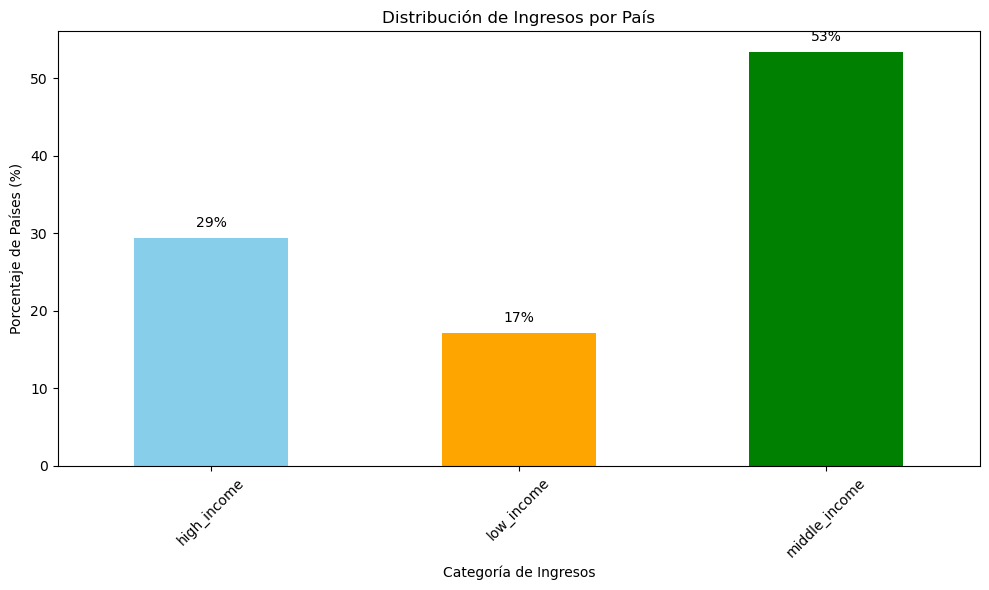

In [40]:
# Filtrar los datos para excluir los valores nulos
filtered_income_data = pib_df[pib_df['income'].notnull()]

income_distribution = filtered_income_data['income'].value_counts()
total_countries = len(filtered_income_data)
percentage_income_distribution = (income_distribution / total_countries) * 100

plt.figure(figsize=(10, 6))
percentage_income_distribution.sort_index().plot(kind='bar', color=['skyblue', 'orange', 'green', 'purple', 'pink'])
plt.xlabel('Categoría de Ingresos')
plt.ylabel('Porcentaje de Países (%)')
plt.title('Distribución de Ingresos por País')
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(percentage_income_distribution.sort_index()):
    plt.text(i, v + 1, f'{int(v)}%', ha='center', va='bottom')

plt.show()


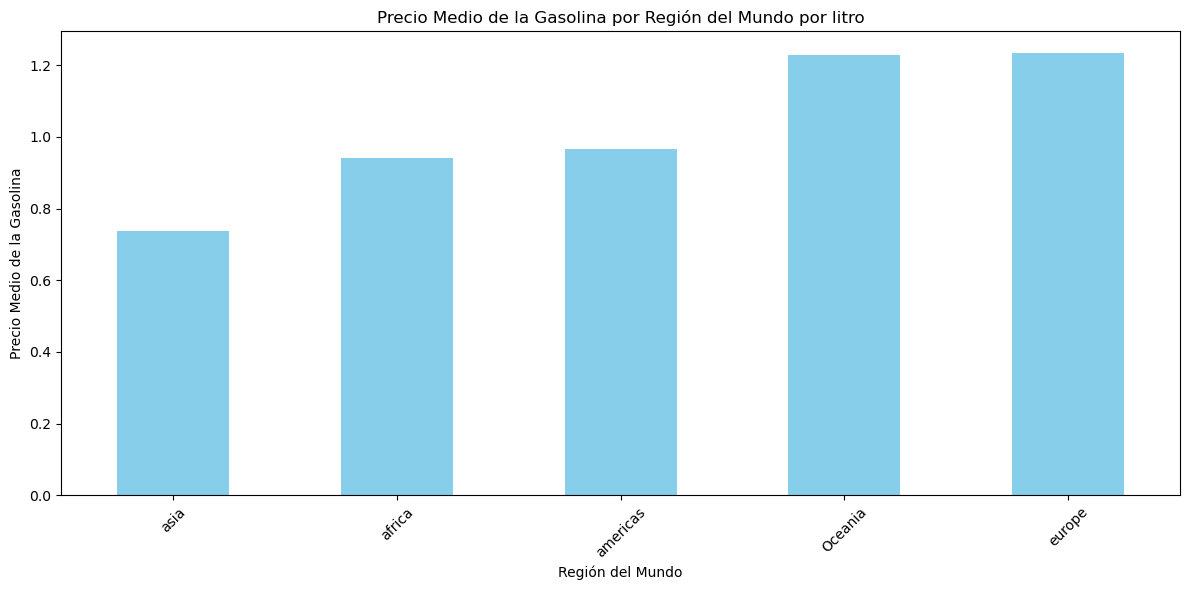

In [41]:
mean_gasoline_price = pib_df.groupby('world_region')['gasoline_price_lit'].mean()

plt.figure(figsize=(12, 6))
mean_gasoline_price.sort_values().plot(kind='bar', color='skyblue')
plt.xlabel('Región del Mundo')
plt.ylabel('Precio Medio de la Gasolina')
plt.title('Precio Medio de la Gasolina por Región del Mundo por litro')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Imputación de datos

In [42]:
train, test = train_test_split(pib_df, test_size=0.3, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(train))
print("Tamaño del conjunto de prueba:", len(test))
print("Dimensiones de data_train:", train.shape)
print("Dimensiones de data_test:", test.shape)

Tamaño del conjunto de entrenamiento: 116
Tamaño del conjunto de prueba: 50
Dimensiones de data_train: (116, 20)
Dimensiones de data_test: (50, 20)


In [43]:
train.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate,world_region,co2_mayor_a_media,income,gasoline_price_lit,gini,population,hild_mortality
134,Slovenia,12729.45,14.94,1.16,58.90,214368000.00,49.40,69.34,79.34,10.00,19.42,55.90,48.60,europe,no,high_income,1.32,25.40,2119844.00,2.02
94,"Macedonia, FYR",2221.19,8.94,2.10,52.10,168883000.00,26.80,51.91,74.85,9.00,7.88,34.90,66.90,europe,no,middle_income,NaN,35.60,2093599.00,9.09
11,Bangladesh,558.06,0.17,0.29,16.60,598774000.00,53.60,3.70,68.94,5.00,14.54,68.10,27.14,asia,no,middle_income,1.12,32.40,171186372.00,25.45
66,Guyana,1200.65,8.70,0.88,29.50,69329333.33,41.80,29.88,69.93,6.00,35.75,58.90,28.38,americas,no,middle_income,0.90,43.20,808726.00,27.88
128,Rwanda,338.27,9.99,0.73,8.80,20152000.00,80.50,13.00,55.44,-3.00,13.12,79.80,18.34,africa,no,low_income,1.17,45.10,13776698.00,29.11


In [44]:
# Observamos la cantidad de columnas con valores nulos en el dataset de entrenamiento

percentage_result = train.isnull().sum()/pib_df.shape[0] * 100

percentage_result = pd.DataFrame({"columns": percentage_result.keys(), "%": percentage_result})
percentage_result.reset_index(drop=True, inplace=True)
percentage_result

,columns,%
0,country,0.00
1,incomeperperson,1.20
2,alcconsumption,0.00
3,armedforcesrate,1.81
4,breastcancerper100th,0.60
5,co2emissions,1.20
6,femaleemployrate,0.00
7,internetuserate,1.20
8,lifeexpectancy,0.00
9,polityscore,1.20


In [45]:
train.isnull().tail() # obtenemos una matrix boleana donde se muestra datos nulos 

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate,world_region,co2_mayor_a_media,income,gasoline_price_lit,gini,population,hild_mortality
71,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
92,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

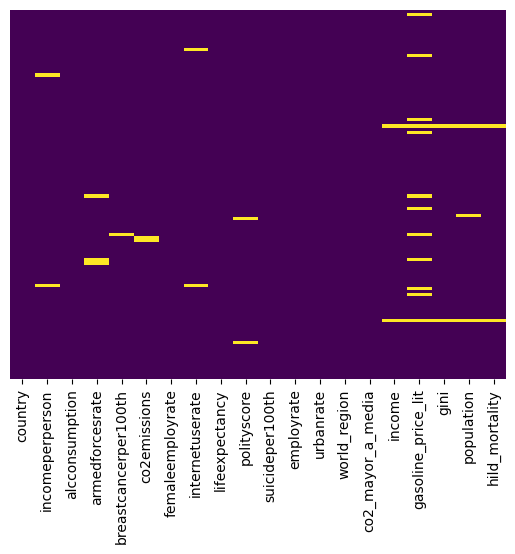

In [46]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # eliminamos eje Y , leyenda de las barras

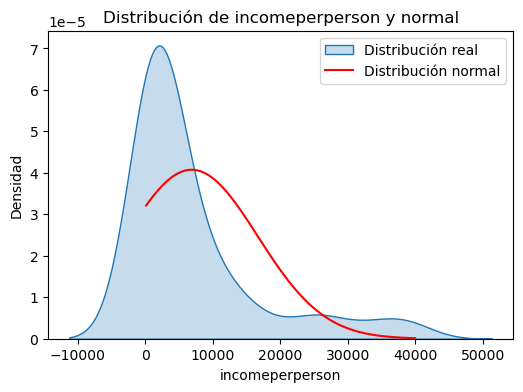

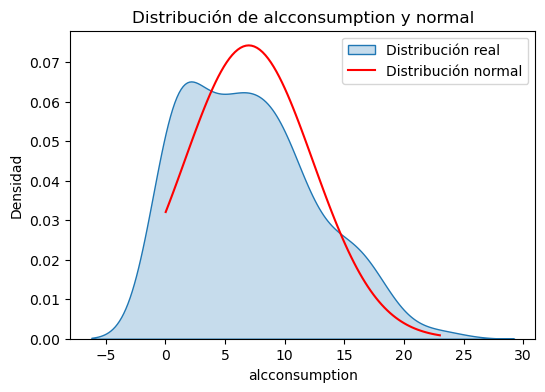

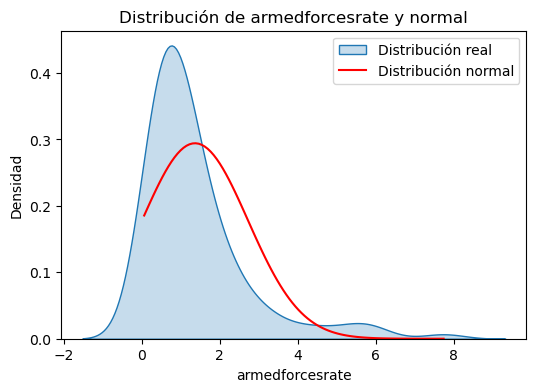

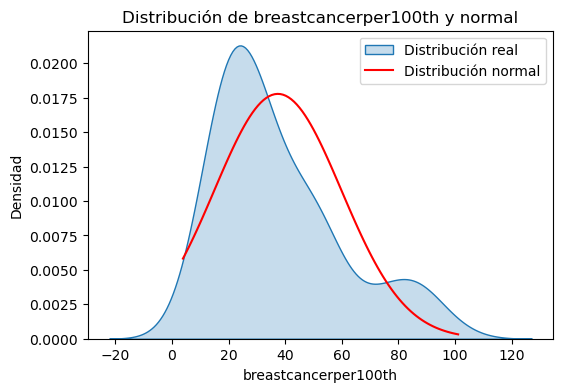

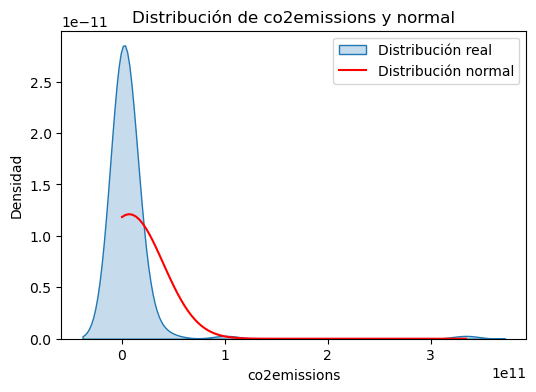

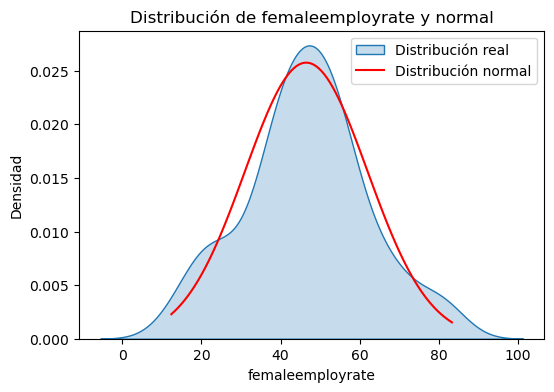

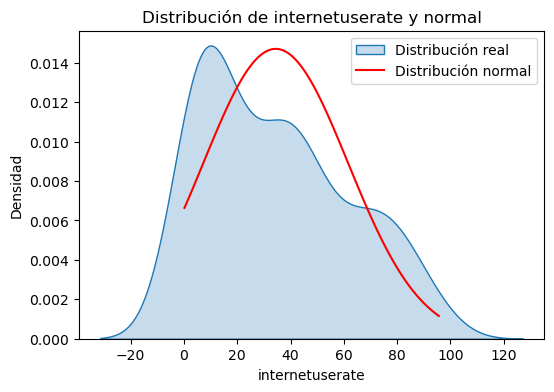

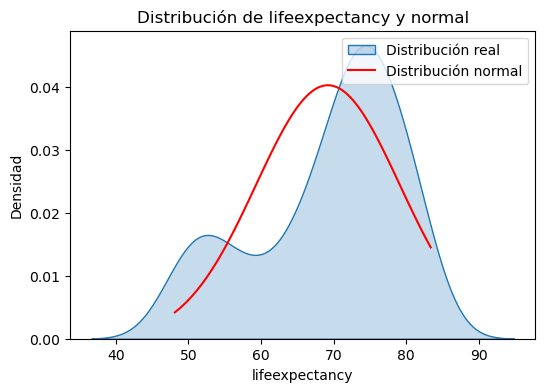

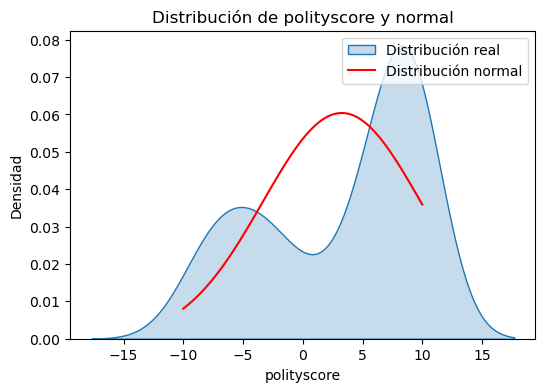

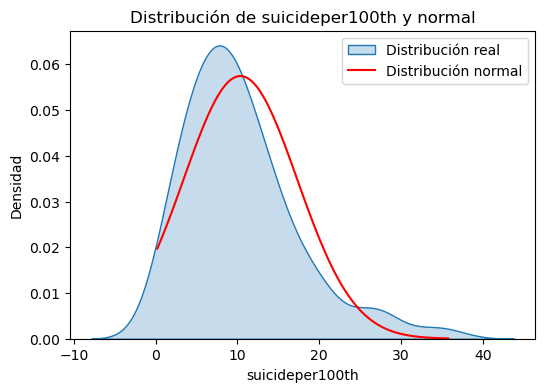

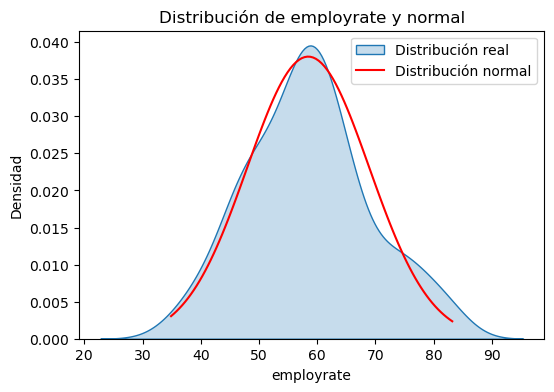

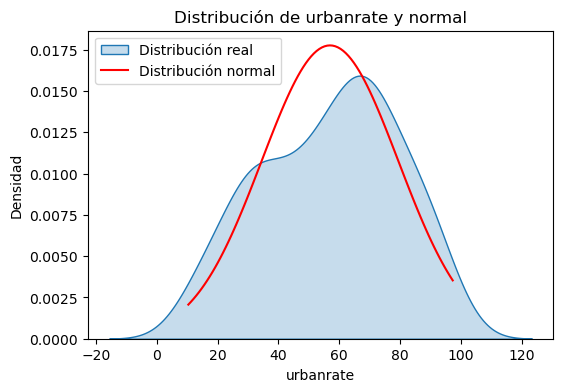

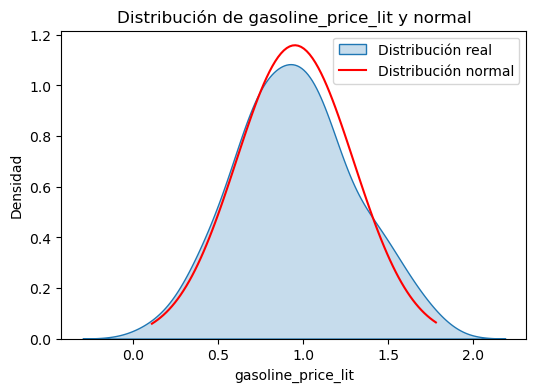

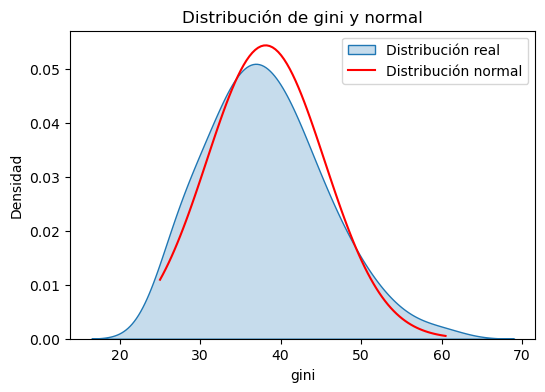

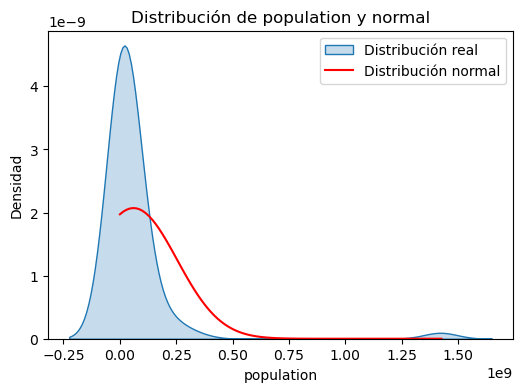

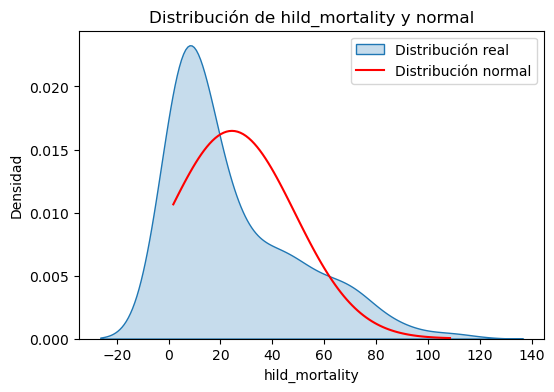

In [47]:
numeric_columns = train.select_dtypes(include=[np.number])


for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(train[col].dropna(), label='Distribución real', shade=True)
    plt.plot(np.linspace(train[col].min(), train[col].max(), 100), 
             stats.norm.pdf(np.linspace(train[col].min(), train[col].max(), 100), 
                            train[col].mean(), train[col].std()), 
             label='Distribución normal', color='r')
    plt.xlabel(col)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {col} y normal')
    plt.legend()
    plt.show()

gasoline_price_lit(media):La distribución de datos es simétrica. Por lo tanto, la mejor manera de imputar los datos sería utilizar la media o la mediana. La elección del método de imputación dependerá de las preferencias del analista.

language(Moda):Debido a que es una variable categorica la imputaremos usando el valor que más se repite.

**Imputación de datos**

In [48]:
train.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate         float64
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
internetuserate         float64
lifeexpectancy          float64
polityscore             float64
suicideper100th         float64
employrate              float64
urbanrate               float64
world_region             object
co2_mayor_a_media        object
income                   object
gasoline_price_lit      float64
gini                    float64
population              float64
hild_mortality          float64
dtype: object

In [49]:
imputation_strategies = {
    'incomeperperson': 'median',
    'armedforcesrate': 'median',
    'breastcancerper100th': 'median',
    'co2emissions': 'median',
    'femaleemployrate': 'mean',
    'internetuserate': 'median',
    'polityscore': 'median',
    'employrate': 'median',
    'gasoline_price_lit': 'mean',
    'gini':'median',
    'population':'median',
    'hild_mortality':'median',  
    'income': lambda x: x.value_counts().index[0]
}
train = pd.get_dummies(train, columns=['income'], prefix=['categoria'])


data_train= train.copy()


imputation_by_group = {}  

for col, strategy in imputation_strategies.items():
    if col in data_train.columns:
        if strategy == 'mean':
            imputer = data_train.groupby('world_region')[col].transform('mean')
        elif strategy == 'median':
            imputer = data_train.groupby('world_region')[col].transform('median')
        
 
        imputation_by_group[col] = {'strategy': strategy, 'imputation': imputer}
        

        data_train[col].fillna(imputer, inplace=True)


print(data_train.isnull().sum())

import json


missing_values_dict = data_train.to_dict()


file_path = 'missing_values.json'


with open(file_path, 'w') as file:
    json.dump(missing_values_dict, file)



country                    0
incomeperperson            0
alcconsumption             0
armedforcesrate            0
breastcancerper100th       0
co2emissions               0
femaleemployrate           0
internetuserate            0
lifeexpectancy             0
polityscore                0
suicideper100th            0
employrate                 0
urbanrate                  0
world_region               0
co2_mayor_a_media          0
gasoline_price_lit         0
gini                       0
population                 0
hild_mortality             0
categoria_high_income      0
categoria_low_income       0
categoria_middle_income    0
dtype: int64


# Imputamos el dataset de test

In [50]:

test = pd.get_dummies(test, columns=['income'], prefix=['categoria'])
data_test= test.copy()


for col, strategy in imputation_strategies.items():
    if col in data_test.columns:
        if strategy == 'mean':
            imputer = data_train.groupby('world_region')[col].mean()
        elif strategy == 'median':
            imputer = data_train.groupby('world_region')[col].median()
        elif callable(strategy):
            imputer = data_train.groupby('world_region')[col].apply(strategy)

        data_test[col].fillna(data_test['world_region'].map(imputer), inplace=True)


print(data_test.isnull().sum())

country                    0
incomeperperson            0
alcconsumption             0
armedforcesrate            0
breastcancerper100th       0
co2emissions               0
femaleemployrate           0
internetuserate            0
lifeexpectancy             0
polityscore                0
suicideper100th            0
employrate                 0
urbanrate                  0
world_region               0
co2_mayor_a_media          0
gasoline_price_lit         0
gini                       0
population                 0
hild_mortality             0
categoria_high_income      0
categoria_low_income       0
categoria_middle_income    0
dtype: int64


In [51]:
print(data_train.shape)
print(data_test.shape)

(116, 22)
(50, 22)


# 3.Realizamos el proceso de entrenamiento del modelo

**Parámetros**

In [52]:
training_features = [
'alcconsumption',
'breastcancerper100th',
'internetuserate',
'employrate',
'gini',
"gasoline_price_lit",   
'categoria_high_income',
'categoria_low_income',
'categoria_middle_income'
]
target = 'incomeperperson'
train_X = data_train[training_features]
train_Y = data_train[target]
test_X = data_test[training_features]
test_Y = data_test[target]

# Regresión Lineal Simple

In [53]:
model = LinearRegression()
model.fit(train_X, train_Y)


train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)


train_rmse = np.sqrt(mean_squared_error(train_Y, train_predictions))
train_mae = mean_absolute_error(train_Y, train_predictions)
train_r2 = r2_score(train_Y, train_predictions)


test_rmse = np.sqrt(mean_squared_error(test_Y, test_predictions))
test_mae = mean_absolute_error(test_Y, test_predictions)
test_r2 = r2_score(test_Y, test_predictions)


print("Indicadores para el conjunto de entrenamiento:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R2:", train_r2)
print("\nIndicadores para el conjunto de prueba:")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R2:", test_r2)


Indicadores para el conjunto de entrenamiento:
RMSE: 4801.140797979562
MAE: 3454.5249187316895
R2: 0.7542017450597344

Indicadores para el conjunto de prueba:
RMSE: 6291.934633619368
MAE: 4068.173744887005
R2: 0.713660426833076


# Regresión Lineal Variable Logaritmizada

In [54]:
# Logaritmizar la variable objetivo
train_Y_log = np.log(train_Y)  


model = LinearRegression()
model.fit(train_X, train_Y_log)  


train_predictions_log = model.predict(train_X)
test_predictions_log = model.predict(test_X)


train_rmse_log = np.sqrt(mean_squared_error(np.log(train_Y), train_predictions_log))
train_mae_log = mean_absolute_error(np.log(train_Y), train_predictions_log)
train_r2_log = r2_score(np.log(train_Y), train_predictions_log)


test_rmse_log = np.sqrt(mean_squared_error(np.log(test_Y), test_predictions_log))
test_mae_log = mean_absolute_error(np.log(test_Y), test_predictions_log)
test_r2_log = r2_score(np.log(test_Y), test_predictions_log)


print("Indicadores para el conjunto de entrenamiento con la variable objetivo logaritmizada:")
print("RMSE:", train_rmse_log)
print("MAE:", train_mae_log)
print("R2:", train_r2_log)
print("\nIndicadores para el conjunto de prueba con la variable objetivo logaritmizada:")
print("RMSE:", test_rmse_log)
print("MAE:", test_mae_log)
print("R2:", test_r2_log)

Indicadores para el conjunto de entrenamiento con la variable objetivo logaritmizada:
RMSE: 0.6554410148684603
MAE: 0.500943649594992
R2: 0.8036644945555707

Indicadores para el conjunto de prueba con la variable objetivo logaritmizada:
RMSE: 0.6130506270086215
MAE: 0.4616097069464248
R2: 0.8792892491117685


# Regresión Lineal de Ridge

In [55]:
# Entrenar el modelo Ridge
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(train_X, train_Y)

train_predictions = ridge_model.predict(train_X)
test_predictions = ridge_model.predict(test_X)

train_rmse = np.sqrt(mean_squared_error(train_Y, train_predictions))
train_mae = mean_absolute_error(train_Y, train_predictions)
train_r2 = r2_score(train_Y, train_predictions)

test_rmse = np.sqrt(mean_squared_error(test_Y, test_predictions))
test_mae = mean_absolute_error(test_Y, test_predictions)
test_r2 = r2_score(test_Y, test_predictions)

print("Indicadores para el conjunto de entrenamiento:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R2:", train_r2)
print("\nIndicadores para el conjunto de prueba:")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R2:", test_r2)


Indicadores para el conjunto de entrenamiento:
RMSE: 4802.709249021787
MAE: 3455.485237858376
R2: 0.7540411226088672

Indicadores para el conjunto de prueba:
RMSE: 6276.121474138358
MAE: 4056.5235212867656
R2: 0.7150978999479738


# Regresión Polinomial de grado 2

In [56]:
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
polyreg.fit(train_X, train_Y)


train_predictions_poly = polyreg.predict(train_X)
test_predictions_poly = polyreg.predict(test_X)


train_rmse_poly = np.sqrt(mean_squared_error(train_Y, train_predictions_poly))
test_rmse_poly = np.sqrt(mean_squared_error(test_Y, test_predictions_poly))

train_r2_poly = r2_score(train_Y, train_predictions_poly)
test_r2_poly = r2_score(test_Y, test_predictions_poly)

# Mostrar métricas
print("Métricas para regresión polinomial de grado 2:")
print("RMSE (entrenamiento):", train_rmse_poly)
print("RMSE (prueba):", test_rmse_poly)
print("R2 (entrenamiento):", train_r2_poly)
print("R2 (prueba):", test_r2_poly)


Métricas para regresión polinomial de grado 2:
RMSE (entrenamiento): 3134.402569345175
RMSE (prueba): 5521.4189889011395
R2 (entrenamiento): 0.8952390422819357
R2 (prueba): 0.7794970632189313


# Regresión Lineal Usando Lasso

In [57]:

# Entrenar el modelo Lasso
lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(train_X, train_Y)


train_predictions = lasso_model.predict(train_X)
test_predictions = lasso_model.predict(test_X)


train_rmse = np.sqrt(mean_squared_error(train_Y, train_predictions))
train_mae = mean_absolute_error(train_Y, train_predictions)
train_r2 = r2_score(train_Y, train_predictions)


test_rmse = np.sqrt(mean_squared_error(test_Y, test_predictions))
test_mae = mean_absolute_error(test_Y, test_predictions)
test_r2 = r2_score(test_Y, test_predictions)


print("Indicadores para el conjunto de entrenamiento:")
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R2:", train_r2)
print("\nIndicadores para el conjunto de prueba:")
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R2:", test_r2)


Indicadores para el conjunto de entrenamiento:
RMSE: 4801.151147698056
MAE: 3453.9670451369766
R2: 0.7542006853343092

Indicadores para el conjunto de prueba:
RMSE: 6290.664689423786
MAE: 4066.3195415972855
R2: 0.7137760029166125


# EVALUACIÓN DE MODELOS

Podemos observar que el modelo con la variable logaritmizada tiene un mejor comportamiento en cuanto a los errores por ende realizaremos el análisis correspondiente con esto.

In [58]:
train_Y_log = np.log(train_Y)


model = LinearRegression()
model.fit(train_X, train_Y_log) 


intercept_log = model.intercept_
coefs_log = model.coef_


print("Intercepto (en escala logarítmica):", intercept_log)
print("Coeficientes (en escala logarítmica):", coefs_log)

Intercepto (en escala logarítmica): 6.154650334521394
Coeficientes (en escala logarítmica): [-0.03319736  0.00863369  0.03844235 -0.00398833  0.02644863 -0.47474869
  0.49378477 -0.89583329 -0.06109247]


In [59]:
print("Intercepto (en escala logarítmica):", intercept_log)
     

Intercepto (en escala logarítmica): 6.154650334521394


In [60]:
feature_names = train_X.columns

coefficients = model.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f'Variable: {feature}, Coeficiente: {coef}')

Variable: alcconsumption, Coeficiente: -0.03319736134678866
Variable: breastcancerper100th, Coeficiente: 0.008633693083241523
Variable: internetuserate, Coeficiente: 0.03844234936463896
Variable: employrate, Coeficiente: -0.003988325161195086
Variable: gini, Coeficiente: 0.02644863041401096
Variable: gasoline_price_lit, Coeficiente: -0.4747486931156135
Variable: categoria_high_income, Coeficiente: 0.4937847708883154
Variable: categoria_low_income, Coeficiente: -0.8958332880171443
Variable: categoria_middle_income, Coeficiente: -0.0610924733276585


# Interpretación de los coeficientes

1.alcconsumption (Consumo de Alcohol): Un aumento de una unidad en el consumo de alcohol se asocia con una disminución del 3.32% en el ingreso por persona.

2.breastcancerper100th (Tasa de Cáncer de Mama por cada 100 personas): Un aumento de una unidad en la tasa de cáncer de mama por cada 100 personas se relaciona con un incremento del 0.86% en el ingreso por persona.

3.internetuserate (Tasa de Usuarios de Internet):Un aumento de una unidad en la tasa de usuarios de Internet se asocia con un incremento del 3.84% en el ingreso por persona.

4.employrate (Tasa de Empleo):Un aumento de una unidad en la tasa de empleo se relaciona con una disminución del 0.40% en el ingreso por persona.

5.gini (Coeficiente de Gini, medida de desigualdad):Un incremento de una unidad en el coeficiente de Gini (mayor desigualdad) se asocia con un aumento del 2.64% en el ingreso por persona.

6.gasoline_price_lit (Precio de la Gasolina por Litro):Un aumento de una unidad en el precio de la gasolina por litro se relaciona con una disminución del 47.47% en el ingreso por persona.

7.categoria_high_income (Categoría de Ingresos Alto): Estar en la categoría de ingresos alto en comparación con la referencia se asocia con un incremento del 49.38% en el ingreso por persona.

8.categoria_low_income (Categoría de Ingresos Bajo): Estar en la categoría de ingresos bajo en comparación con la referencia se relaciona con una disminución del 89.58% en el ingreso por persona.

9.categoria_middle_income (Categoría de Ingresos Medio):Estar en la categoría de ingresos medio en comparación con la referencia se asocia con una disminución del 6.11% en el ingreso por persona.

# Supuestos de Regresión

# 1.Colinealidad

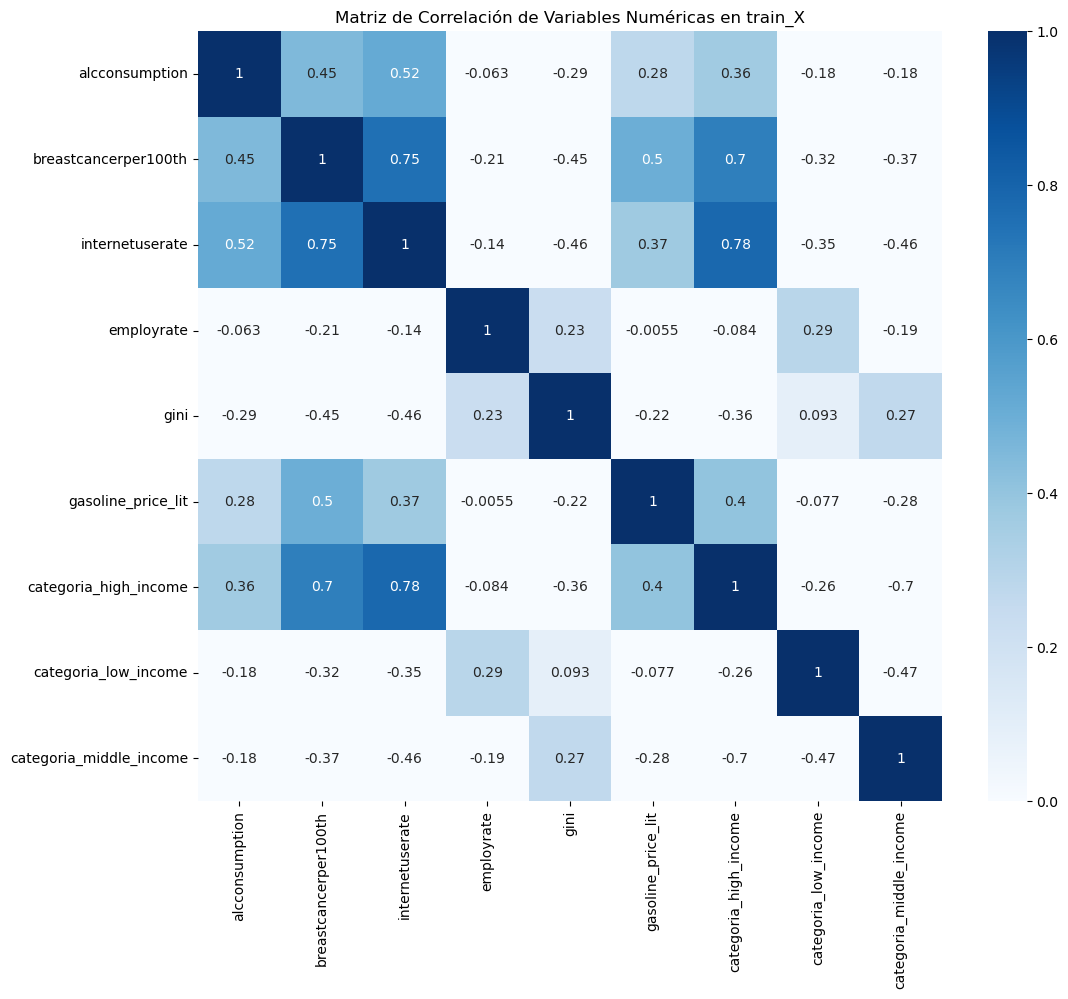

In [61]:

plt.figure(figsize=(12, 10))
sns.heatmap(train_X.corr(), cmap="Blues", vmin=0, vmax=1, annot=True)
plt.title('Matriz de Correlación de Variables Numéricas en train_X')
plt.show()

In [62]:
train_X.corr()

,alcconsumption,breastcancerper100th,internetuserate,employrate,gini,gasoline_price_lit,categoria_high_income,categoria_low_income,categoria_middle_income
alcconsumption,1.00,0.45,0.52,-0.06,-0.29,0.28,0.36,-0.18,-0.18
breastcancerper100th,0.45,1.00,0.75,-0.21,-0.45,0.50,0.70,-0.32,-0.37
internetuserate,0.52,0.75,1.00,-0.14,-0.46,0.37,0.78,-0.35,-0.46
employrate,-0.06,-0.21,-0.14,1.00,0.23,-0.01,-0.08,0.29,-0.19
gini,-0.29,-0.45,-0.46,0.23,1.00,-0.22,-0.36,0.09,0.27
gasoline_price_lit,0.28,0.50,0.37,-0.01,-0.22,1.00,0.40,-0.08,-0.28
categoria_high_income,0.36,0.70,0.78,-0.08,-0.36,0.40,1.00,-0.26,-0.70
categoria_low_income,-0.18,-0.32,-0.35,0.29,0.09,-0.08,-0.26,1.00,-0.47
categoria_middle_income,-0.18,-0.37,-0.46,-0.19,0.27,-0.28,-0.70,-0.47,1.00


In [63]:
features2 = ["alcconsumption", "breastcancerper100th", "internetuserate", "employrate","gini","gasoline_price_lit"]

In [64]:
train_X[features2].corr()

,alcconsumption,breastcancerper100th,internetuserate,employrate,gini,gasoline_price_lit
alcconsumption,1.00,0.45,0.52,-0.06,-0.29,0.28
breastcancerper100th,0.45,1.00,0.75,-0.21,-0.45,0.50
internetuserate,0.52,0.75,1.00,-0.14,-0.46,0.37
employrate,-0.06,-0.21,-0.14,1.00,0.23,-0.01
gini,-0.29,-0.45,-0.46,0.23,1.00,-0.22
gasoline_price_lit,0.28,0.50,0.37,-0.01,-0.22,1.00


In [65]:

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LinearRegression()) 
])

pipeline.fit(train_X[features2], np.log(train_Y))

predictions = pipeline.predict(test_X[features2])

In [66]:
pd.DataFrame({"columns": features2, "coef": pipeline["model"].coef_})

,columns,coef
0,alcconsumption,-0.20
1,breastcancerper100th,0.29
2,internetuserate,1.29
3,employrate,-0.10
4,gini,0.24
5,gasoline_price_lit,-0.16


In [67]:
pipeline["model"].intercept_

7.851388967531878

In [68]:
print("MAE:")
print("Train:", mean_absolute_error(np.log(train_Y), pipeline.predict(train_X[features2])))
print("Test:", mean_absolute_error(np.log(test_Y), pipeline.predict(test_X[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(np.log(train_Y), pipeline.predict(train_X[features2]))))
print("Test:", np.sqrt(mean_squared_error(np.log(test_Y), pipeline.predict(test_X[features2]))))

MAE:
Train: 0.5537501475478114
Test: 0.5659940126717123

RMSE:
Train: 0.719352743643681
Test: 0.6905211830815041


Utilizando variables que no tengan una correlación fuerte podemos ver que el modelo mejora sus métricas de error.

# 2. Linealidad

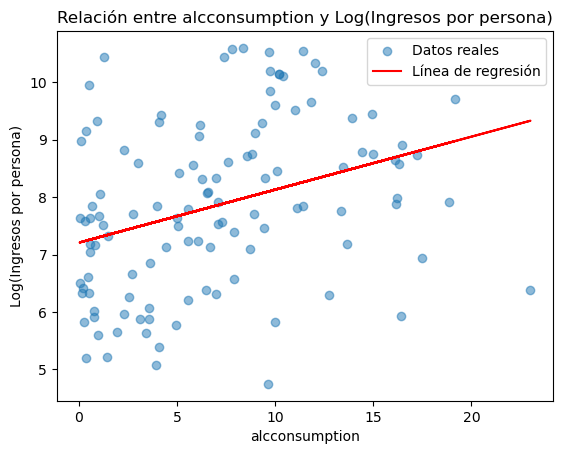

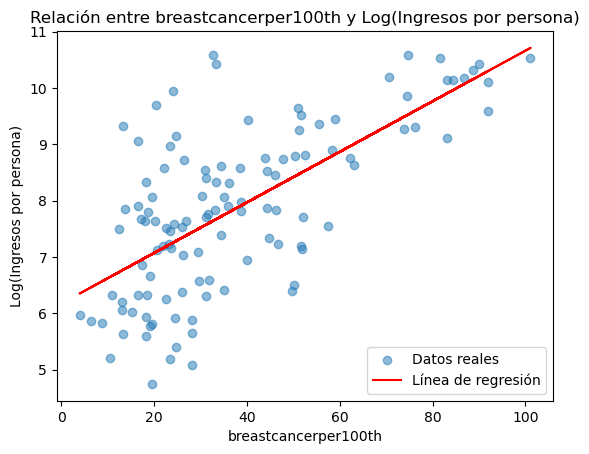

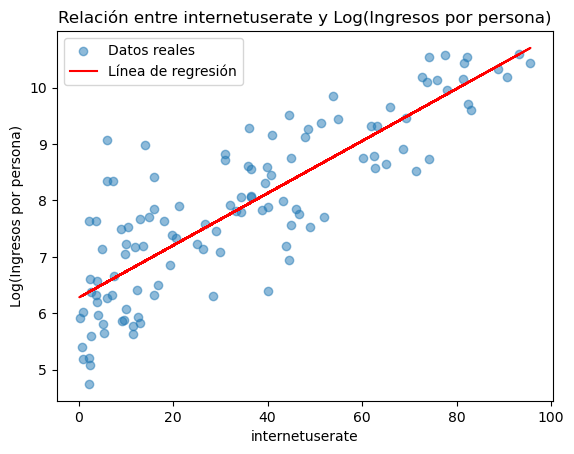

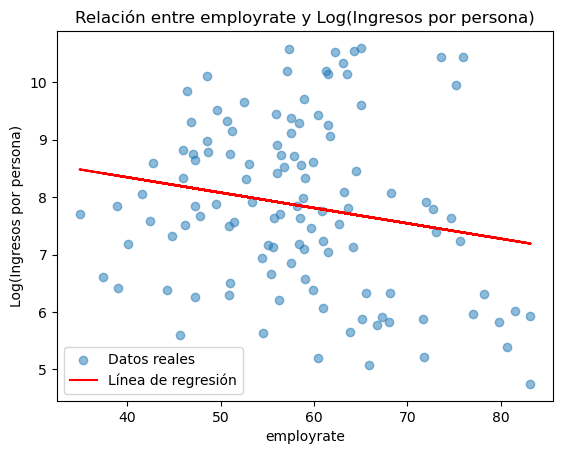

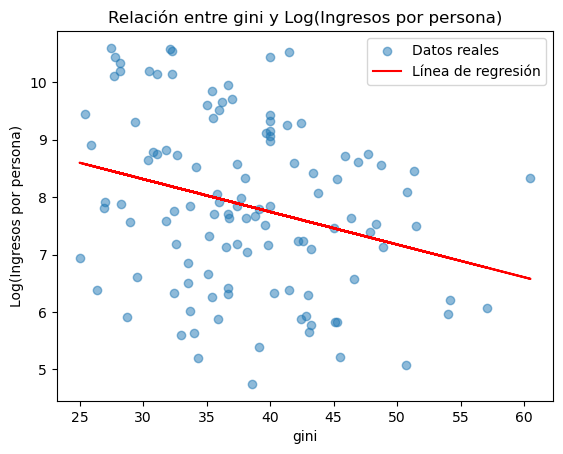

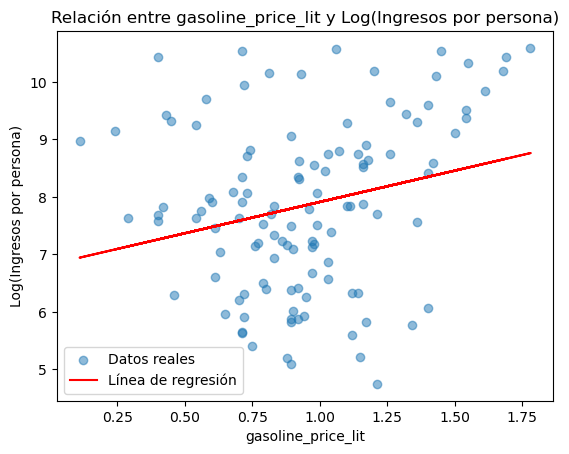

In [69]:

def plot_scatter_and_fit(X, y, feature_name):
    plt.scatter(X, y, alpha=0.5, label='Datos reales')
    plt.xlabel(feature_name)
    plt.ylabel('Log(Ingresos por persona)')
    plt.title(f'Relación entre {feature_name} y Log(Ingresos por persona)')

    coef = np.polyfit(X, y, 1)
    poly1d_fn = np.poly1d(coef)
    plt.plot(X, poly1d_fn(X), 'r-', label='Línea de regresión')
    
    plt.legend()
    plt.show()


for feature in features2:
    plot_scatter_and_fit(train_X[feature], train_Y_log, feature)


Los graficos muestran linealidad sin embargo, hay algunos residuos que no se ajustan a la línea de regresión lo que supone que existen algunos factores adicionales que influyen en el comportamiento de dichas variables

# 3. Normalidad de los errores

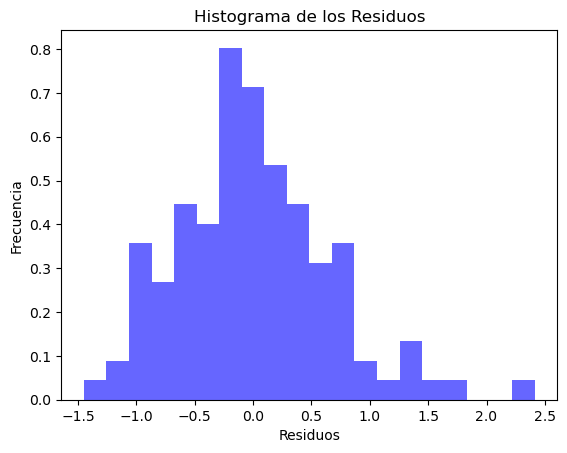

In [70]:

residuals = train_Y_log - train_predictions_log


plt.hist(residuals, bins=20, density=True, alpha=0.6, color='b')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Residuos')
plt.show()

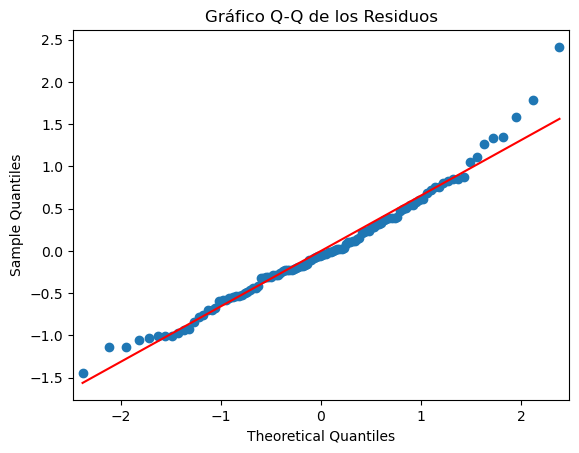

In [71]:

# Gráfico Q-Q de los residuos
sm.qqplot(residuals, line='s')
plt.title('Gráfico Q-Q de los Residuos')
plt.show()

In [72]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [73]:
pipeline.fit(train_X[features2], train_Y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [74]:
errors = (pipeline.predict(train_X[features2])-train_Y).values

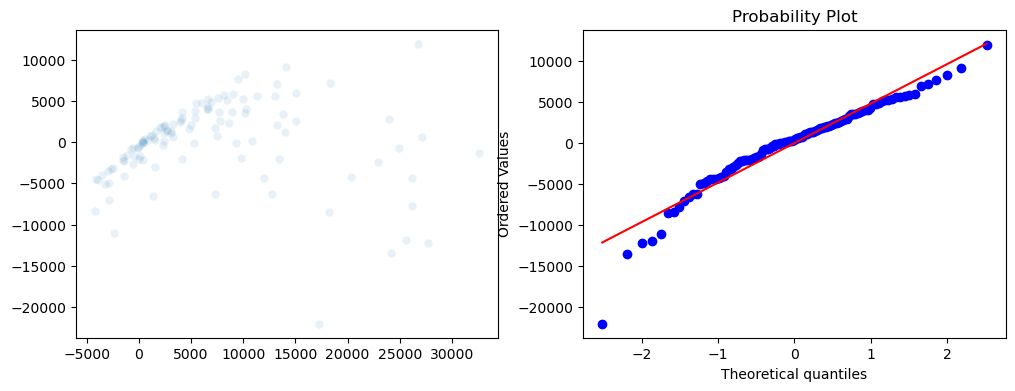

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(train_X[features2]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# 4.Varianza constante (Homocedasticidad)

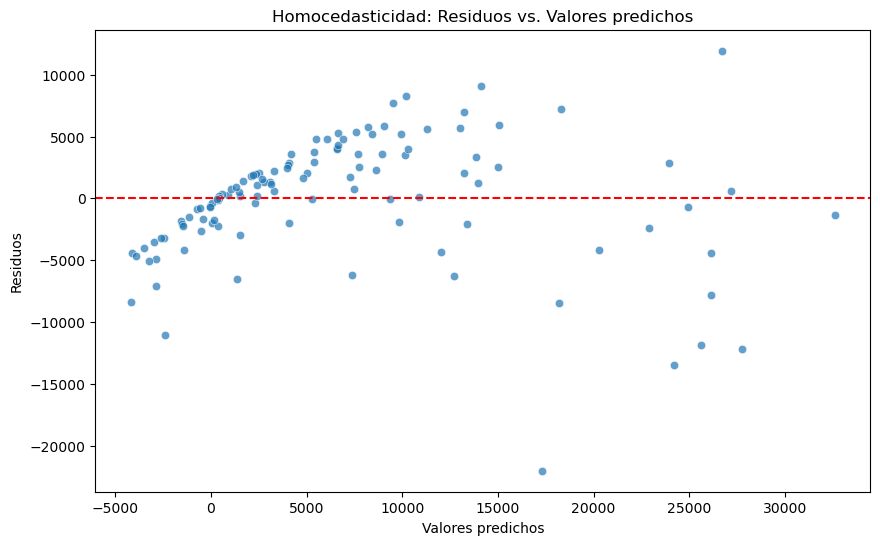

In [76]:
residuals = pipeline.predict(train_X[features2]) - train_Y

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pipeline.predict(train_X[features2]), y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Homocedasticidad: Residuos vs. Valores predichos')
plt.show()

In [77]:
train_X_with_const = add_constant(train_X[features2])

residuals_squared = residuals**2

# Calculate the Breusch-Pagan test
test_result = het_breuschpagan(residuals_squared, train_X_with_const)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(list(zip(labels, test_result)))

[('LM Statistic', 9.6529976179086), ('LM-Test p-value', 0.14004629696305726), ('F-Statistic', 1.6489678705622228), ('F-Test p-value', 0.14057480531845676)]


El p-valor de 0.14 en el test de Breusch-Pagan indica la probabilidad de obtener un resultado tan extremo como el observado, suponiendo que la hipótesis nula es verdadera. En este caso, la hipótesis nula es que no hay heterocedasticidad en los errores (es decir, la varianza de los errores es constante, indicando homocedasticidad).

Dado que el p-valor (0.14) es mayor que el nivel de significancia comúnmente utilizado de 0.05, no tenemos suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que, en este caso, no hay evidencia suficiente para concluir que hay heterocedasticidad en los errores.

# Conclusiones

En este ejercicio podemos observar que algunas variables tienen una mejor correlación con la variable objetivo, sin embargo, se observan algunos resultados que en la teoría económica son contraintuitivos como por ejemplo decir que disminuciones en la tasa de empleabilidad aumentan el ingreso percibido por persona. Este tipo de situaciones sugiere que se deben tener más variables explicativas que permitan definir mejor la estrategia de evolución del ingreso por persona